In [1]:
from cpflow.core_flow import CPFlow
from old_source_code.data import create_joint_x_y
import torch
from utils import TrainParams

X, Y = create_joint_x_y(1000)
X_dataset = torch.from_numpy(X)
Y_dataset = torch.from_numpy(Y)
device_and_dtype_specifications = dict(dtype=torch.float32, device=torch.device("cpu"))

X_dataset = X_dataset.to(**device_and_dtype_specifications)
Y_dataset = Y_dataset.to(**device_and_dtype_specifications)

dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_dataset, Y_dataset), batch_size=64, shuffle=True
)
train_params = TrainParams(num_epochs=20, learning_rate=0.001, verbose=True)

cpflow = CPFlow(
    feature_dimension=X_dataset.shape[1],
    response_dimension=Y_dataset.shape[1],
    hidden_dimension=64,
    number_of_hidden_layers=10,
)
# cpflow.to(**device_and_dtype_specifications)
# _ = cpflow.fit(train_loader=dataloader, train_params=train_params)

# # to save the model:
# cpflow.save("cpflow.pth")

# to load the model:
cpflow = cpflow.load("cpflow.pth")
cpflow.to(**device_and_dtype_specifications)

CPFlow(
  (flow): SequentialFlow(
    (flows): ModuleList(
      (0): ActNorm(2)
      (1): DeepConvexFlow(
        ConjGrad(rtol=0.0, atol=0.001)
        (icnn): PICNN(
          (act): Softplus()
          (act_c): ELU(alpha=1.0)
          (Wzs): ModuleList(
            (0): Linear(in_features=2, out_features=64, bias=True)
            (1-9): 9 x PosLinear(in_features=64, out_features=64, bias=True)
            (10): PosLinear(in_features=64, out_features=1, bias=False)
          )
          (Wxs): ModuleList(
            (0-8): 9 x Linear(in_features=2, out_features=64, bias=True)
            (9): Linear(in_features=2, out_features=1, bias=False)
          )
          (Wcs): ModuleList(
            (0): Linear(in_features=1, out_features=64, bias=True)
          )
          (Wczs): ModuleList(
            (0-9): 10 x Linear(in_features=64, out_features=64, bias=True)
          )
          (Wcxs): ModuleList(
            (0-9): 10 x Linear(in_features=64, out_features=2, bias=True)
 

/home/nkotelevskii/github/conditional_quantile_function/src/cpflow/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


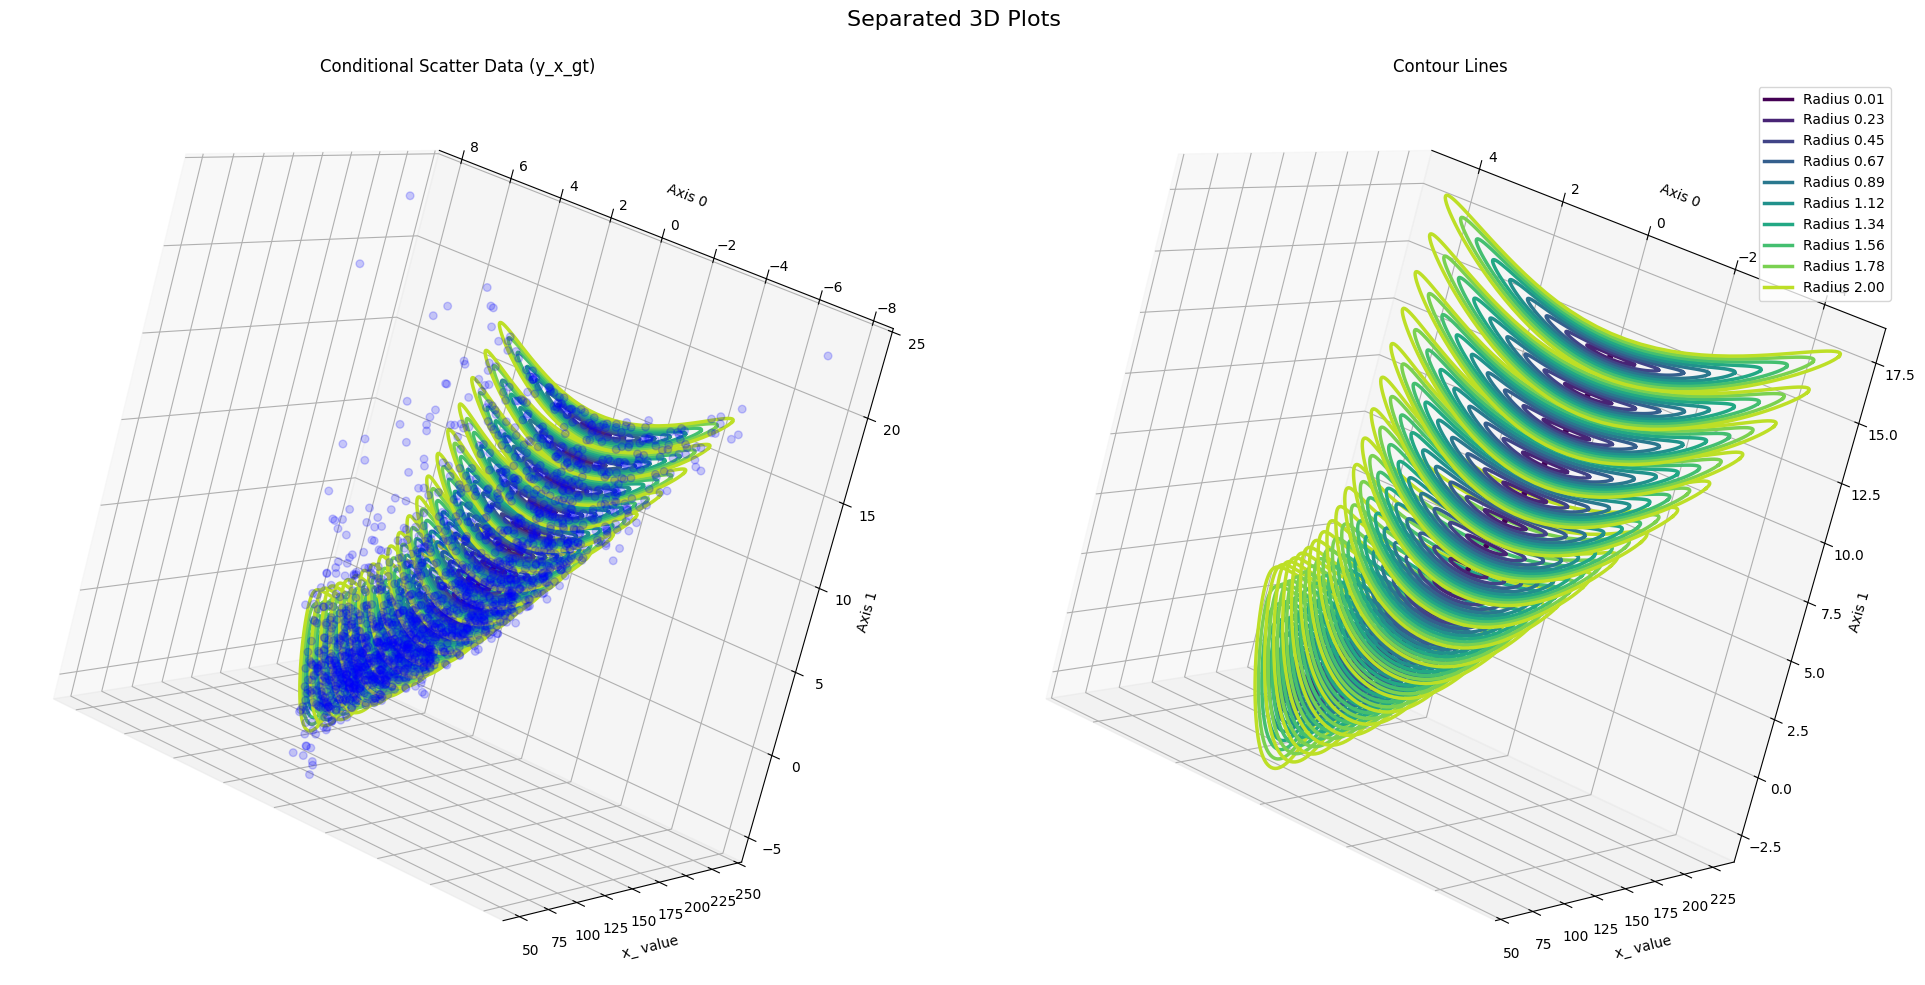

In [2]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(
    model=cpflow, device_and_dtype_specifications=device_and_dtype_specifications
)